# BIG DATA ANALYTICS - Project - GROUP B

## Group Members

| Student Name | Student ID |
|----------|----------|
| Allyssa Sampath    | 816032362     |
| Avinash Roopnarine    | 816029635     |
| Jared Heeralal    | 816030252     |
| Kimberly Moses   | 816031494     |


In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [35]:
df = pd.read_excel('HR_Employee_Data.xlsx')

df.head()

Emp_Id  satisfaction_level  last_evaluation  number_project  \
0  IND02438                0.38             0.53               2   
1  IND28133                0.80             0.86               5   
2  IND07164                0.11             0.88               7   
3  IND30478                0.72             0.87               5   
4  IND24003                0.37             0.52               2   

   average_montly_hours  time_spend_company  Work_accident  left  \
0                   157                   3              0     1   
1                   262                   6              0     1   
2                   272                   4              0     1   
3                   223                   5              0     1   
4                   159                   3              0     1   

   promotion_last_5years Department  salary  
0                      0      sales     low  
1                      0      sales  medium  
2                      0      sales  medium  
3                      0      sales     low  
4                      0      sales     low

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp_Id                 14999 non-null  object 
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   left                   14999 non-null  int64  
 8   promotion_last_5years  14999 non-null  int64  
 9   Department             14999 non-null  object 
 10  salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 1.3+ MB


In [37]:
print(df['left'].value_counts())

left
0    11428
1     3571
Name: count, dtype: int64


#Cleaning

In [38]:
# Handle categorical variables: 'Department' and 'salary'
df = pd.get_dummies(df, columns=['Department', 'salary'])

df.dropna(inplace=True)
df = df.drop(['Emp_Id'], axis=1)

df

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years  Department_IT  Department_RandD  ...  \
0                          0          False             False  ...   
1                          0          False             False  ...   
2                          0          False             False  ...   
3                          0          False             False  ...   
4                          0          False             False  ...   
...                      ...            ...               ...  ...   
14994                      0          False             False  ...   
14995                      0          False             False  ...   
14996                      0          False             False  ...   
14997                      0          False             False  ...   
14998                      0          False             False  ...   

       Department_hr  Department_management  Department_marketing  \
0              False                  False                 False   
1              False                  False                 False   
2              False                  False                 False   
3              False                  False                 False   
4              False                  False                 False   
...              ...                    ...                   ...   
14994          False                  False                 False   
14995          False                  False                 False   
14996          False                  False                 False   
14997          False                  False                 False   
14998          False                  False                 False   

       Department_product_mng  Department_sales  Department_support  \
0                       False              True               False   
1                       False              True               False   
2                       False              True               False   
3                       False              True               False   
4                       False              True               False   
...                       ...               ...                 ...   
14994                   False             False                True   
14995                   False             False                True   
14996                   False             False                True   
14997            

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      14999 non-null  float64
 1   last_evaluation         14999 non-null  float64
 2   number_project          14999 non-null  int64  
 3   average_montly_hours    14999 non-null  int64  
 4   time_spend_company      14999 non-null  int64  
 5   Work_accident           14999 non-null  int64  
 6   left                    14999 non-null  int64  
 7   promotion_last_5years   14999 non-null  int64  
 8   Department_IT           14999 non-null  bool   
 9   Department_RandD        14999 non-null  bool   
 10  Department_accounting   14999 non-null  bool   
 11  Department_hr           14999 non-null  bool   
 12  Department_management   14999 non-null  bool   
 13  Department_marketing    14999 non-null  bool   
 14  Department_product_mng  14999 non-null

A pairplot is a grid of scatterplots showing the relationship between pairs of variables in a dataset.

**Commented out below to reduce running time**

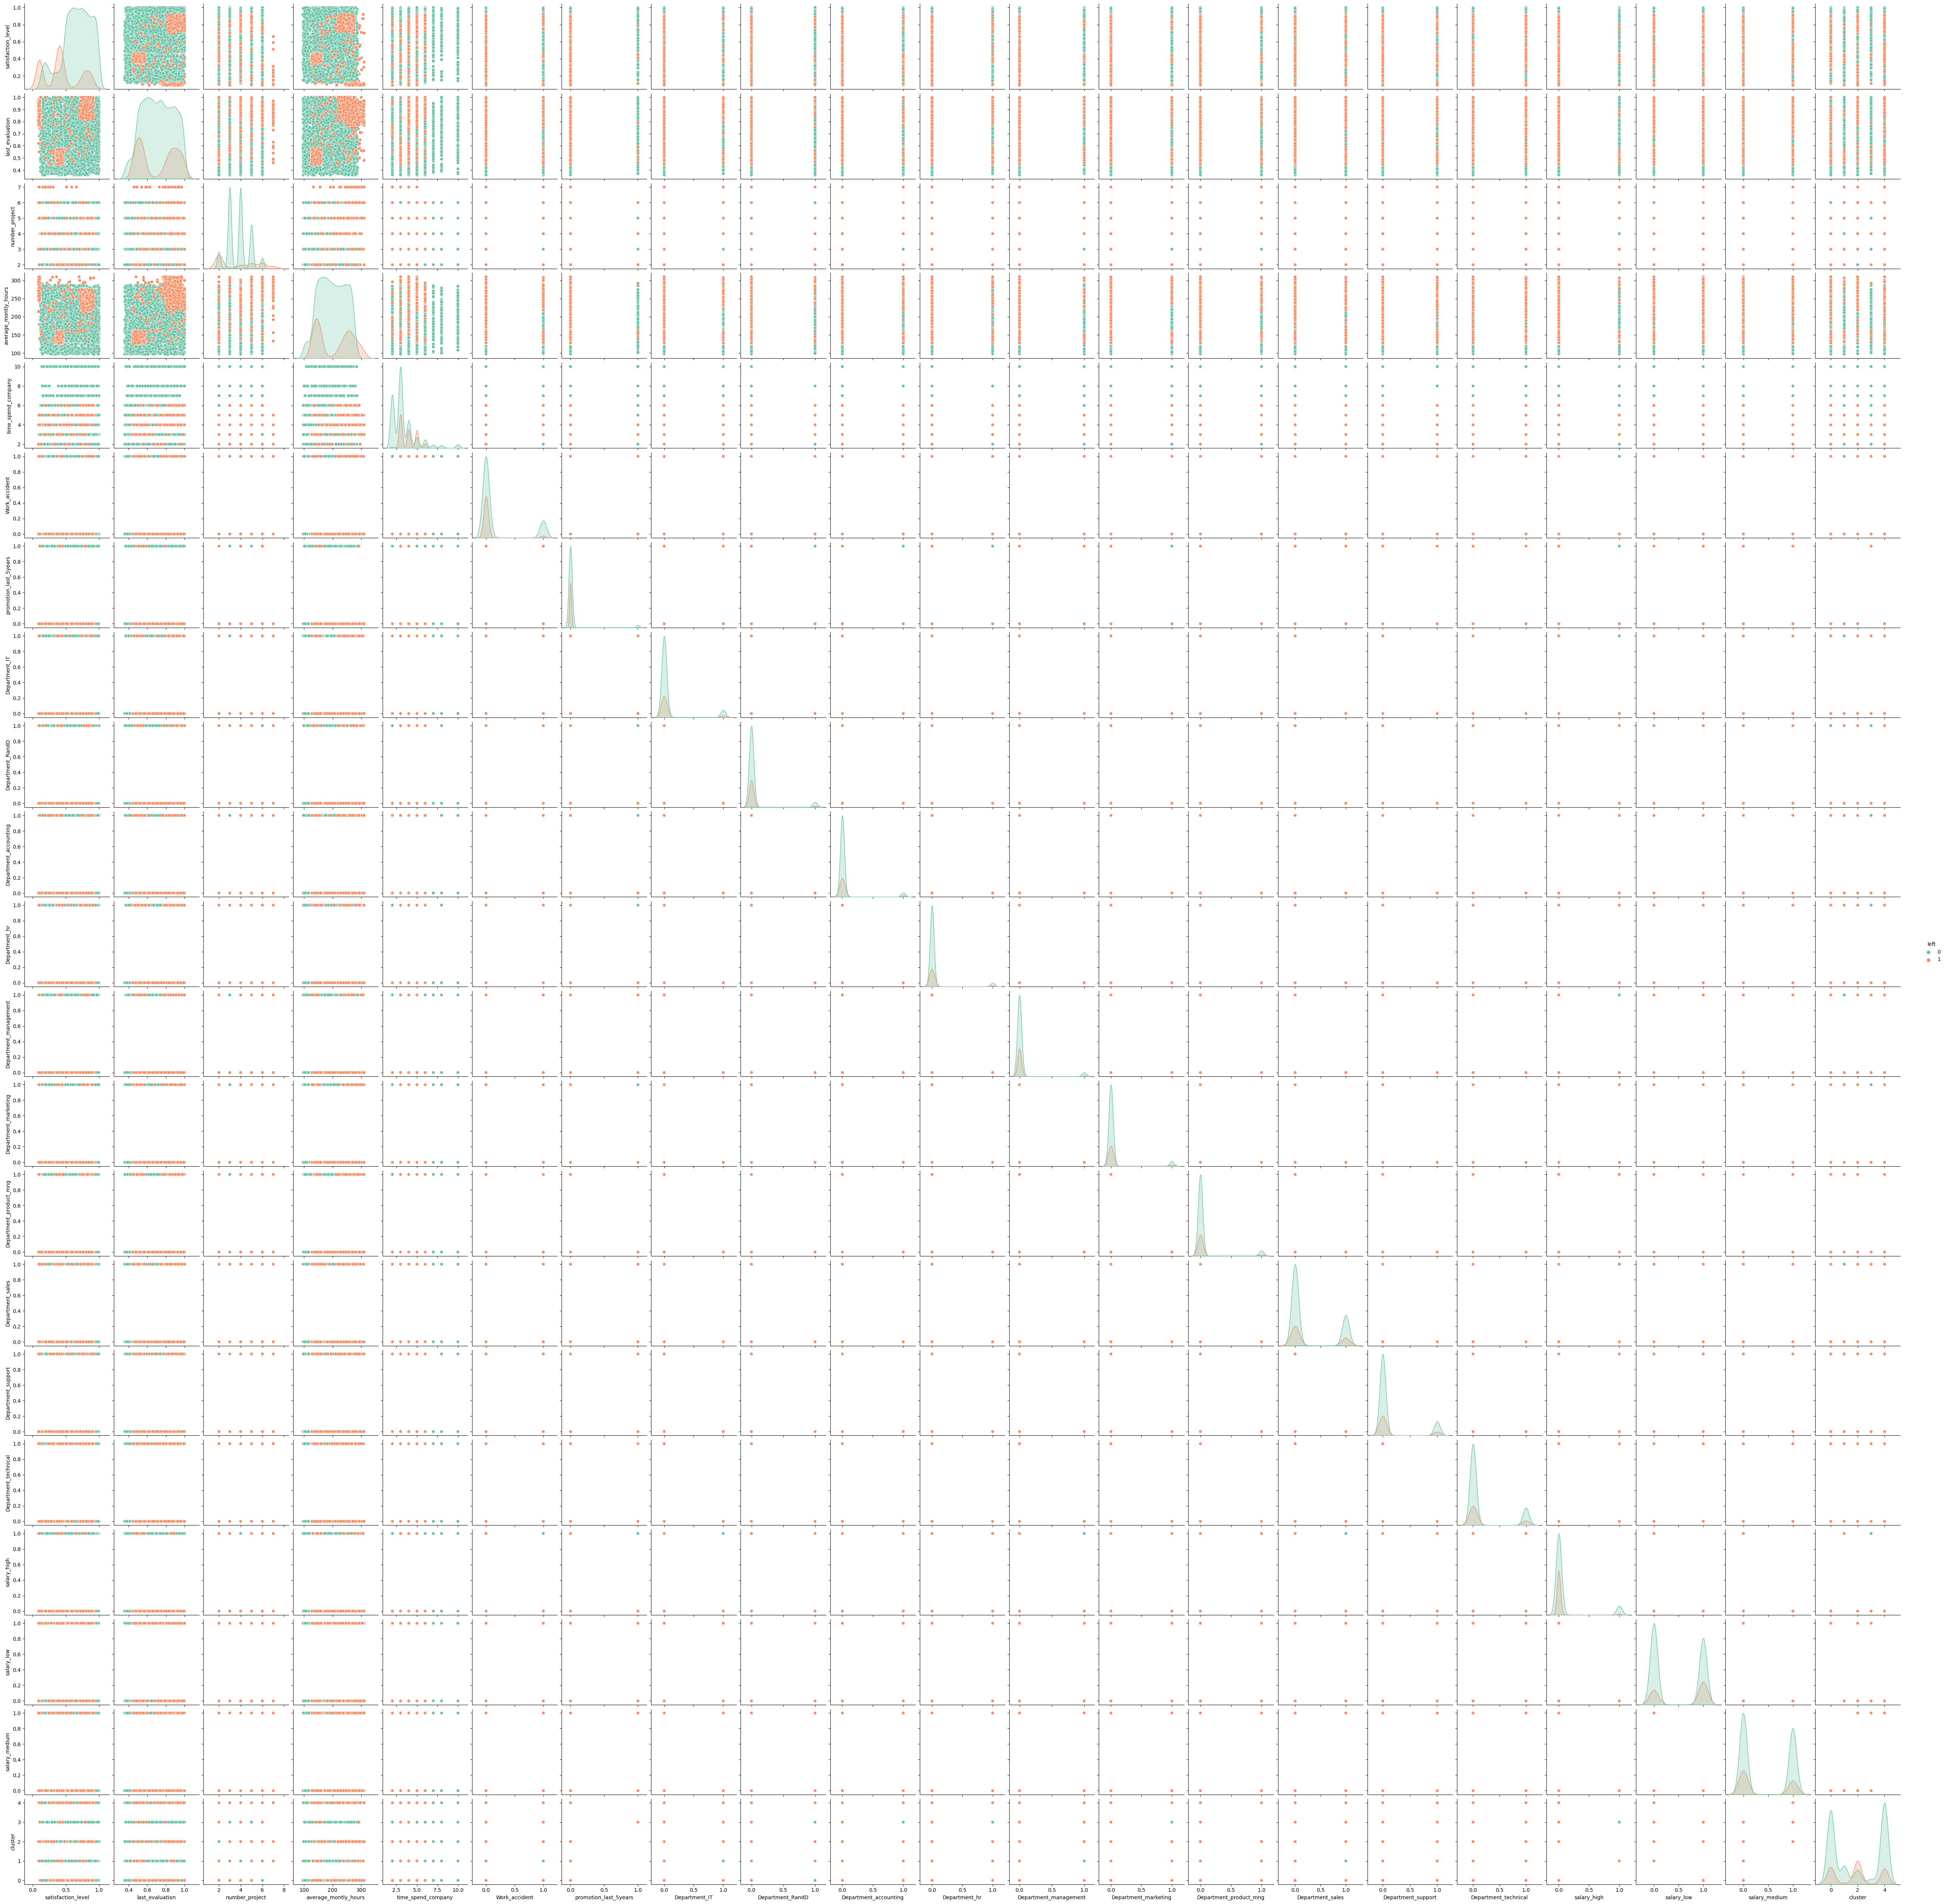

In [51]:
# Perform exploratory data analysis (EDA)
# Visualize feature distributions and relationships

# sns.pairplot(df, diag_kind='kde', hue='left')
# plt.show()

sns.pairplot(df, hue='left', palette='Set2')
plt.show()

#K-Means for Employee Clustering

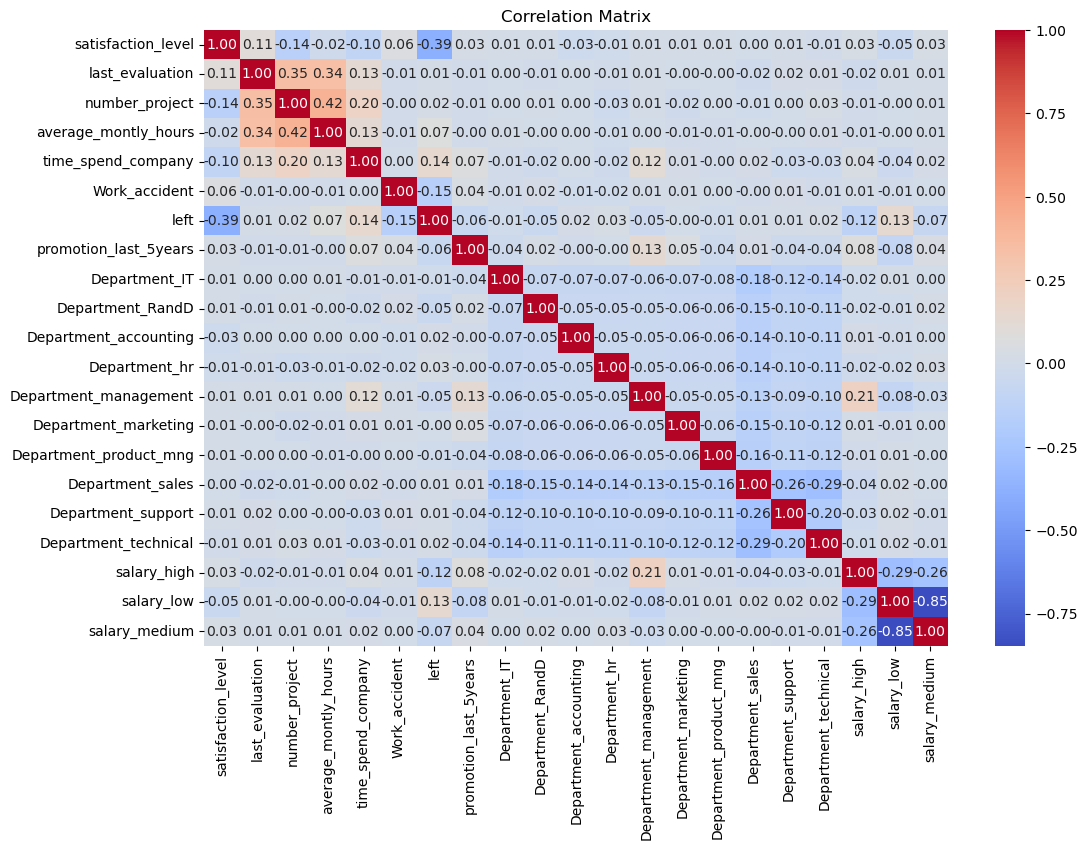

In [41]:
# Calculate and visualise correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [42]:
# Identify important features based on correlation with the target variable ('left')
important_features = correlation_matrix['left'].sort_values(ascending=False)
print("Important Features:")
print(important_features)

# Choose features with high absolute correlation values with the target variable
selected_features = ['satisfaction_level', 'time_spend_company', 'average_montly_hours', 'number_project']
selected_features += ['last_evaluation', 'Work_accident', 'promotion_last_5years', 'salary_low', 'salary_medium', 'salary_high']

df_subset = df[selected_features]

print("DataFrame with Selected Features:")
df_subset.head()

Important Features:
left                      1.000000
time_spend_company        0.144822
salary_low                0.134722
average_montly_hours      0.071287
Department_hr             0.028249
number_project            0.023787
Department_technical      0.020076
Department_accounting     0.015201
Department_support        0.010700
Department_sales          0.009923
last_evaluation           0.006567
Department_marketing     -0.000859
Department_IT            -0.010925
Department_product_mng   -0.011029
Department_management    -0.046035
Department_RandD         -0.046596
promotion_last_5years    -0.061788
salary_medium            -0.068833
salary_high              -0.120929
Work_accident            -0.154622
satisfaction_level       -0.388375
Name: left, dtype: float64
DataFrame with Selected Features:


satisfaction_level  time_spend_company  average_montly_hours  \
0                0.38                   3                   157   
1                0.80                   6                   262   
2                0.11                   4                   272   
3                0.72                   5                   223   
4                0.37                   3                   159   

   number_project  last_evaluation  Work_accident  promotion_last_5years  \
0               2             0.53              0                      0   
1               5             0.86              0                      0   
2               7             0.88              0                      0   
3               5             0.87              0                      0   
4               2             0.52              0                      0   

   salary_low  salary_medium  salary_high  
0        True          False        False  
1       False           True        False  
2       False           True        False  
3        True          False        False  
4        True          False        False

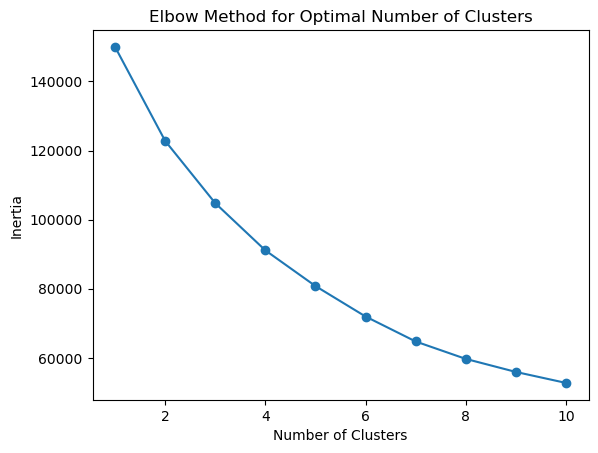

In [43]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_subset)


# Elbow method
inertia_values = []
num_clusters_range = range(1, 11)
for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia_values.append(kmeans.inertia_)

# Print inertia values for each number of clusters
# print("Number of Clusters | Inertia")
# for num_clusters, inertia in zip(num_clusters_range, inertia_values):
#     print(f"{num_clusters:18d} | {inertia:.2f}")

plt.plot(num_clusters_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

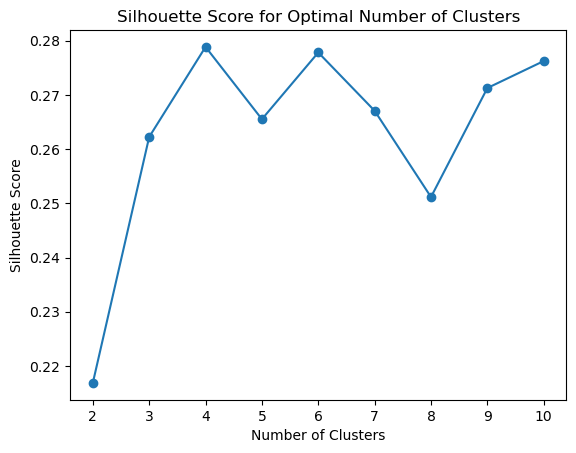

In [44]:
# Silhouette scores methof
silhouette_scores = []
num_clusters_range = range(2, 11)
for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(num_clusters_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.show()

In [45]:
num_clusters = 5

kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
kmeans.fit(scaled_features)

# Add cluster labels to DataFrame
df['cluster'] = kmeans.labels_

# Analyze and interpret clusters
cluster_summary = df.groupby('cluster')[selected_features].mean()
print("Cluster Summary:")
cluster_summary

Cluster Summary:


satisfaction_level  time_spend_company  average_montly_hours  \
cluster                                                                 
0                  0.650610            3.015665            186.085330   
1                  0.636910            3.581974            200.102146   
2                  0.391061            4.682980            249.930273   
3                  0.656019            4.166144            199.849530   
4                  0.658728            3.424221            195.829585   

         number_project  last_evaluation  Work_accident  \
cluster                                                   
0              3.346296         0.671209       0.159786   
1              3.768240         0.705451       0.151931   
2              5.331745         0.854755       0.076657   
3              3.752351         0.706019       0.238245   
4              3.630969         0.705559       0.150865   

         promotion_last_5years  salary_low  salary_medium  salary_high  
cluster                                                                 
0                          0.0    1.000000       0.000000     0.000000  
1                          0.0    0.000000       0.000000     1.000000  
2                          0.0    0.789952       0.210048     0.000000  
3                          1.0    0.206897       0.567398     0.225705  
4                          0.0    0.000000       1.000000     0.000000

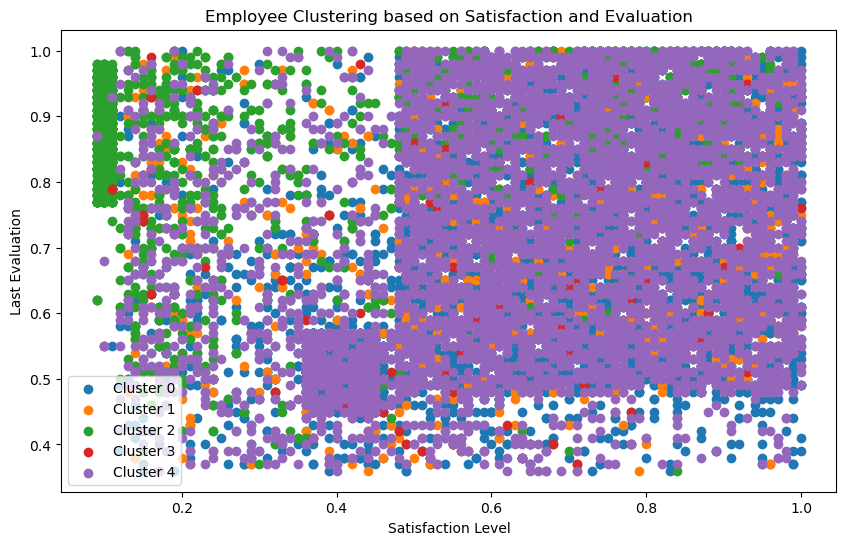

In [46]:
# Visualize clusters
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    plt.scatter(df[df['cluster'] == cluster]['satisfaction_level'], df[df['cluster'] == cluster]['last_evaluation'], label=f'Cluster {cluster}')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('Employee Clustering based on Satisfaction and Evaluation')
plt.legend()
plt.show()

- **Cluster 0:** This cluster represents employees with a moderately high satisfaction level (0.650), average time spent in the company (3.012 years), and moderate workload. They have a relatively low occurrence of work accidents (0.159) and are mostly in low-salary positions (1.0).
- **Cluster 1:** Employees in this cluster have similar satisfaction levels to Cluster 0 but slightly longer tenure (3.424 years) and higher average monthly hours (196). They are more evenly distributed across salary levels.
- **Cluster 2:** This cluster represents employees with lower satisfaction levels (0.394), longer tenure (4.683 years), and higher workload compared to other clusters. They have a significantly higher last evaluation score (0.855) and are primarily in low-salary positions (0.793).
- **Cluster 3:** Employees in this cluster have similar satisfaction levels to Cluster 0 and 1 but longer tenure (4.166 years) and slightly higher work accident rates (0.238). They have a mix of salary levels, with a relatively higher proportion in medium-salary positions (0.567).
- **Cluster 4:** This cluster represents employees with similar characteristics to Cluster 0 and 1 in terms of satisfaction level, but slightly longer tenure (3.582 years) and similar workload. They are mostly in high-salary positions (1.0).

Overall, these clusters provide insights into different groups of employees based on their satisfaction levels, tenure, workload, and salary levels.

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
import numpy as np
import pandas as pd

# Assuming 'df' is your DataFrame
y = df['time_spend_company']  # Target variable for regression
X = df.drop(columns=['time_spend_company', 'left'])  # Features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the models
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
gbm_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)
logistic_reg = LogisticRegression(max_iter=1000, random_state=42).fit(X_train, (y_train > np.median(y_train)).astype(int))  # Assuming binary classification

# Extract feature importances or coefficients
features = X_train.columns
rf_results = pd.DataFrame({'Feature': features, 'Importance_RF': rf_regressor.feature_importances_}).sort_values(by='Importance_RF', ascending=False)
gbm_results = pd.DataFrame({'Feature': features, 'Importance_GBM': gbm_regressor.feature_importances_}).sort_values(by='Importance_GBM', ascending=False)
linear_results = pd.DataFrame({'Feature': features, 'Coefficient_Linear': linear_reg.coef_}).sort_values(by='Coefficient_Linear', ascending=False, key=lambda col: abs(col))
logistic_results = pd.DataFrame({'Feature': features, 'Coefficient_Logistic': logistic_reg.coef_[0]}).sort_values(by='Coefficient_Logistic', ascending=False)

# Print the sorted results
print("Random Forest Feature Importances (Higher = More Important for Longer Tenure):")
print(rf_results)
print("\nGradient Boosting Feature Importances (Higher = More Important for Longer Tenure):")
print(gbm_results)
print("\nLinear Regression Coefficients (Higher Absolute Value = More Important, Positive = Longer Tenure):")
print(linear_results)
print("\nLogistic Regression Coefficients (Higher = More Likely Above Median Tenure):")
print(logistic_results)


Random Forest Feature Importances (Higher = More Important for Longer Tenure):
                   Feature  Importance_RF
0       satisfaction_level       0.225318
3     average_montly_hours       0.219328
1          last_evaluation       0.169908
19                 cluster       0.111257
2           number_project       0.067971
17              salary_low       0.036895
10   Department_management       0.027294
4            Work_accident       0.024915
13        Department_sales       0.019062
6            Department_IT       0.012698
14      Department_support       0.012412
15    Department_technical       0.011212
11    Department_marketing       0.010580
8    Department_accounting       0.009383
5    promotion_last_5years       0.009166
12  Department_product_mng       0.008847
7         Department_RandD       0.006565
9            Department_hr       0.006320
18           salary_medium       0.006157
16             salary_high       0.004713

Gradient Boosting Feature Importances 

In [48]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# df is cleaned dataset
left_df = df[df['left'] == 1]  # Filter for employees who have left

# Split the dataset into features (X) and target variable (y)
X = left_df.drop(columns=['time_spend_company'])
y = left_df['time_spend_company']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regression': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=42),
    'Neural Network Regression': MLPRegressor(max_iter=2000,random_state=42),
    'Support Vector Regression': SVR()
}

# Dictionary to hold predictions
predictions = {}
rmse_values = {}

# Train and predict with each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    rmse_values[name] = rmse
    print(f"{name} - Root Mean Squared Error: {rmse}")
    predictions[name] = model.predict(scaler.transform(X))  # Predict on the entire dataset

# Add estimated times back to the DataFrame
for name, pred in predictions.items():
    left_df[f'estimated_time_{name.lower().replace(" ", "_")}'] = pred

# Print the first five rows of the updated DataFrame
# print(left_df.tail(5))

Linear Regression - Root Mean Squared Error: 0.49843848152366665
Random Forest Regression - Root Mean Squared Error: 0.3268536166440364
Gradient Boosting Regression - Root Mean Squared Error: 0.4180426654633217
Neural Network Regression - Root Mean Squared Error: 0.4203036632549221
Support Vector Regression - Root Mean Squared Error: 0.47445094648612834


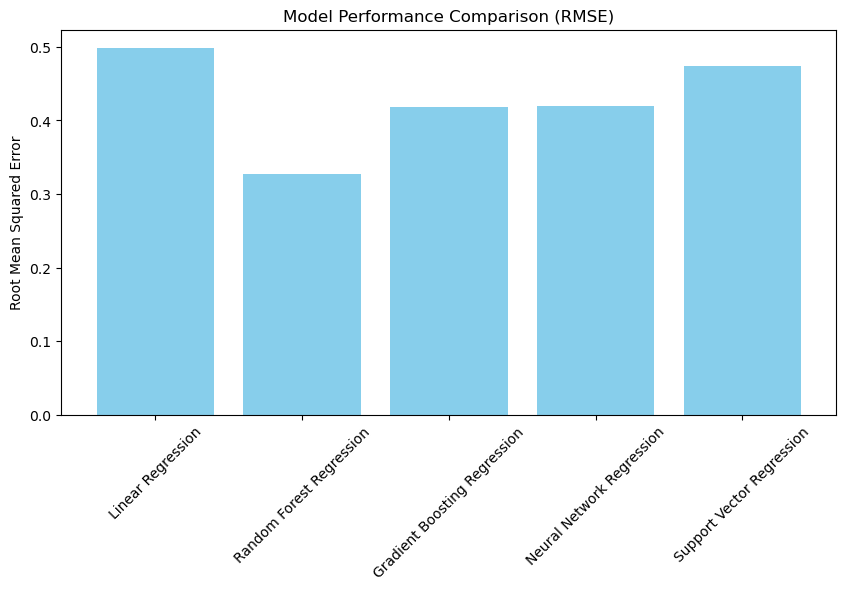

In [50]:
# Visualization
plt.figure(figsize=[10,5])  # Set the figure size for better readability
plt.bar(rmse_values.keys(), rmse_values.values(), color='skyblue')  # Create a bar chart
plt.title('Model Performance Comparison (RMSE)')  # Title of the plot
plt.ylabel('Root Mean Squared Error')  # Y-axis label
plt.xticks(rotation=45)  # Rotate model names for better readability
plt.show()  # Show the plot